Introducción a "R" - Sesión Cero / Parte 2
===

In [2]:
library(ggplot2)

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [40]:
library(lubridate)

<img src="ggplot_layers.png">

El paquete "ggplot2" incluye una tabla de datos llamada "mpg" que contiene datos recogidos por la US Environment Protection Agency sobre 38 modelos de carros. Mostremos los primeros registros de esta tabla.

In [4]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [5]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [6]:
?mpg

mpg {ggplot2},R Documentation


Entre los campos de la tabla "mpg" tenemos a:
* displ, que es el tamaño del motor en litros.
* hwy, que contiene el ratio de eficiencia de consumo de combustible en highway (carretera) expresado en miles per gallon (millas por galón).

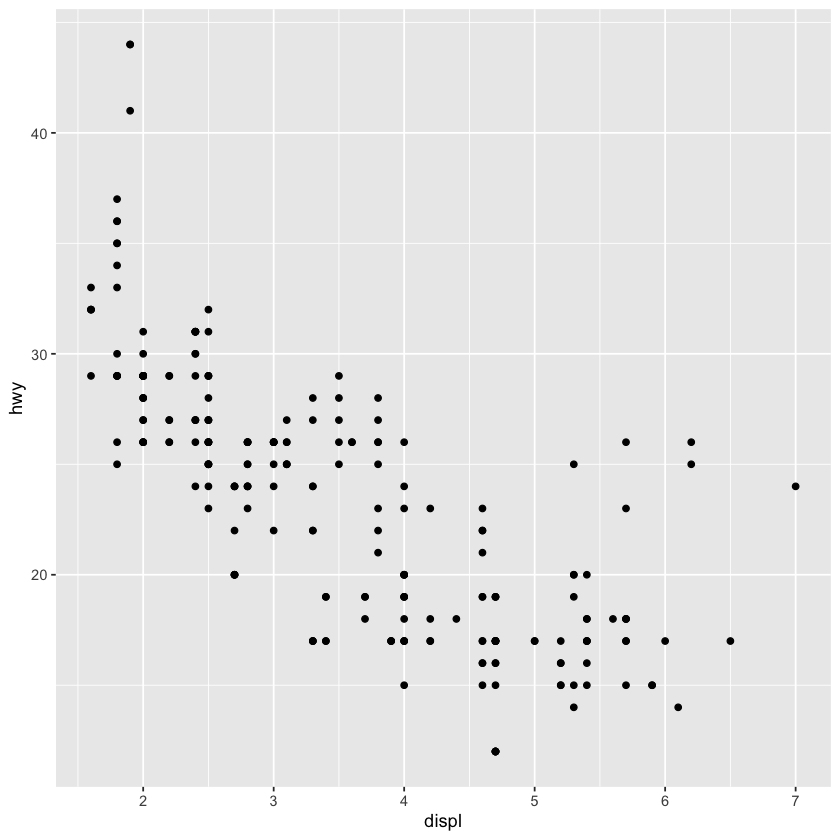

In [6]:
ggplot(data=mpg) +
  geom_point(aes(x = displ, y = hwy))

El gráfico muestra una relación negativa entre el tamaño del motor y el nivel de eficiencia del automóvil. Vale decir, los carros con mayor cilindrada de motor tienen menor eficiencia de consumo de combustible.

Sin embargo, notemos los seis puntos que se destacan en el extremo inferior derecho del gráfico. 

<img src="mpg_outliers.png">

Para analizar ese caso vamos a explotar las opciones de visualización que nos ofrece la capa de Aesthetics.

Como parte de la capa Aesthetic podemos incluir cualquier diferenciación de categoría del valor que estamos graficando. En este caso estamos graficando el valor de la eficiencia (hwy) pero cada uno de esos valores tiene asociado (es decir, pertenece) a una categoría de carro. Revisando la tabla de datos podemos verificar que existe un campo "class" que contiene una categorización correspondiente al valor en análisis.

Podemos entonces hacer que al visualizar el valor de nuestro interés (eficiencia en highway) lo haga diferenciando la categoría de carro indicada en el campor "class".

Primero pediremos que esa diferenciación sea por color.

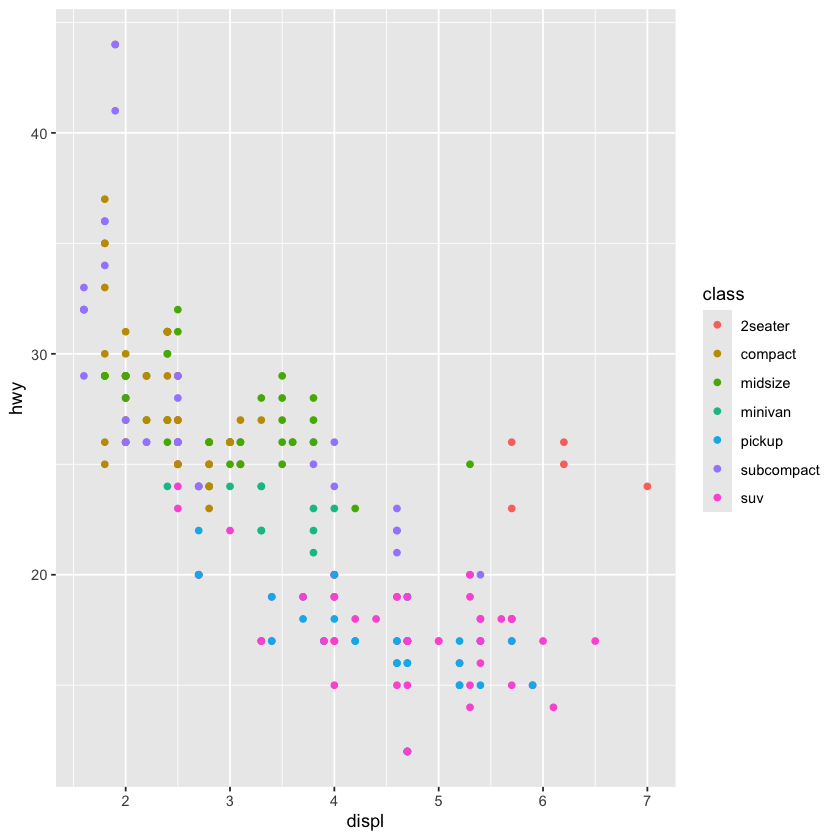

In [10]:
ggplot(data=mpg) +
  geom_point(aes(x = displ, y = hwy, color = class))

Pero también podemos pedir que la diferenciación sea no sea por color del punto, sino por la forma (shape) del punto a visualizar.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because more
than 6 becomes difficult to discriminate
ℹ you have requested 7 values. Consider specifying shapes manually if you need
  that many have them.”
Warning message:
“Removed 62 rows containing missing values or values outside the scale range
(`geom_point()`).”


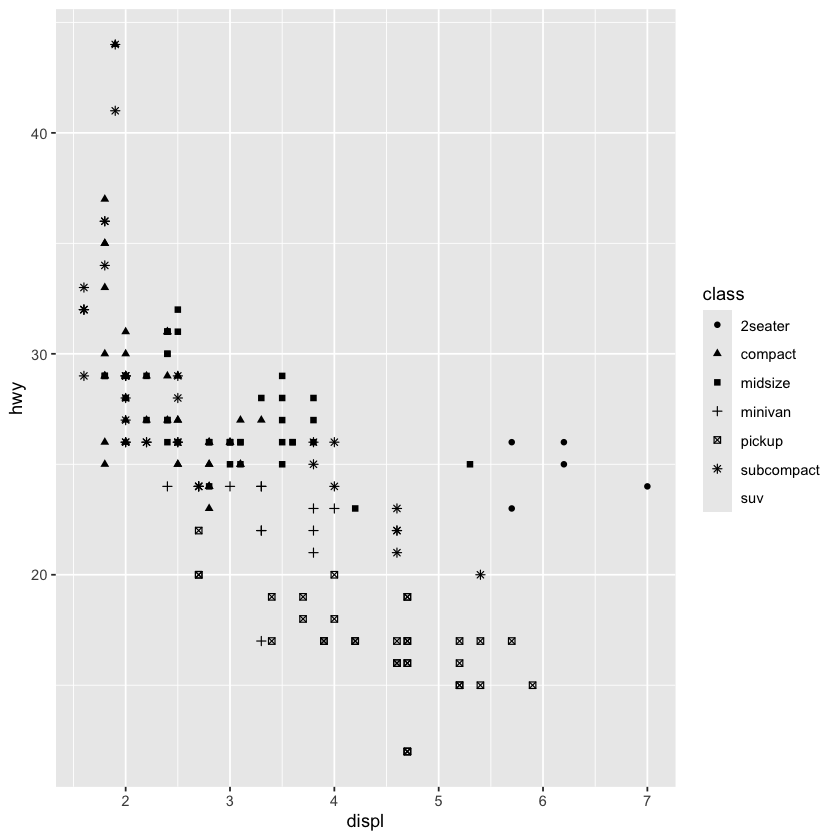

In [8]:
ggplot(data=mpg) +
  geom_point(aes(x = displ, y = hwy, shape = class))

IMPORTANTE
Notemos que en los casos anteriores hemos usado la capa Aesthetic ("aes") para hacer una diferenciacion visual de alguna categoría del valor de interés, una de esas diferenciaciones es el color.

ggplot(data=mpg) +
  geom_point(aes(x = displ, y = hwy, color = class))

Pero, no debemos confundir ese uso del color dentro de "aes", cuando lo que queremos es en realidad que los puntos (líneas, barras, etc) sean de un determinado color. 

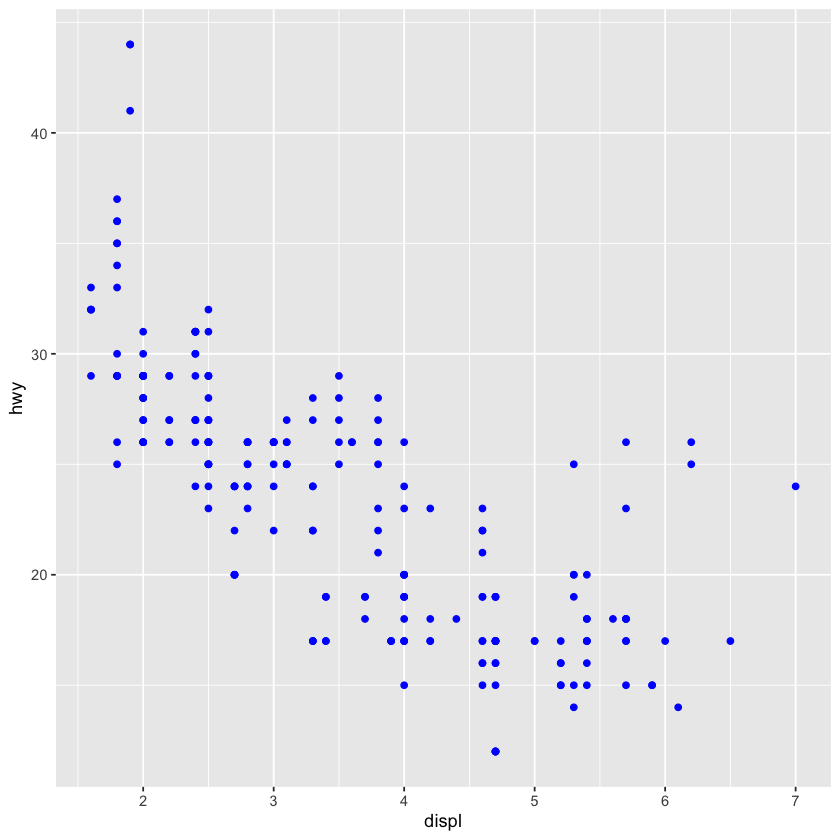

In [11]:
ggplot(data=mpg) +
  geom_point(aes(x = displ, y = hwy), color="blue")

In [12]:
?diamonds

diamonds {ggplot2},R Documentation


Existen geometrías de visualización de valores que no sólo pueden ser diferenciadas por el color (del borde), sino por el relleno ("fill") de la geometría. Ese es el caso de los gráficos de barras.

Note que en la siguiente instrucción NO ESTAMOS INDICANDO el valor "y" a mostrar. Sin embargo, la función ggplot nos ayuda "asumiendo" que nos interesa mostrar la cantidad de ocurrencias asociadas a los valores que indicamos en el eje "x". Vale decir, hemos indicado sólo el eje "x" pero no el eje "y" a graficar, y la función "geom_bar" ha construido el valor "count" para ser mostrado.    

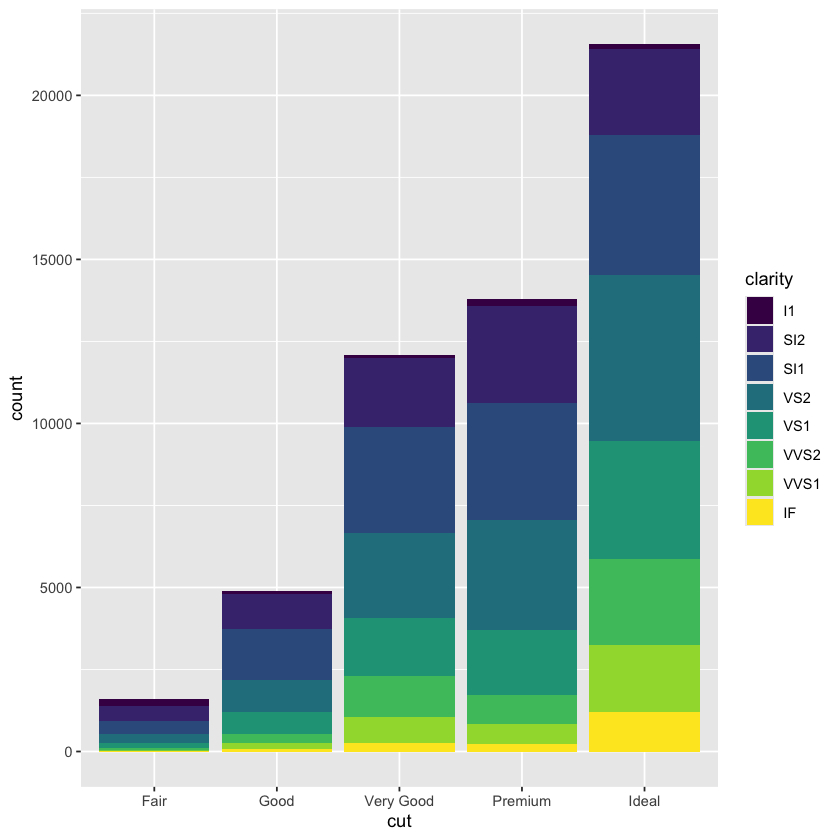

In [15]:
ggplot(data = diamonds) + 
  geom_bar(aes(x = cut, fill = clarity))

Usando "position" del elemento geométrico
==

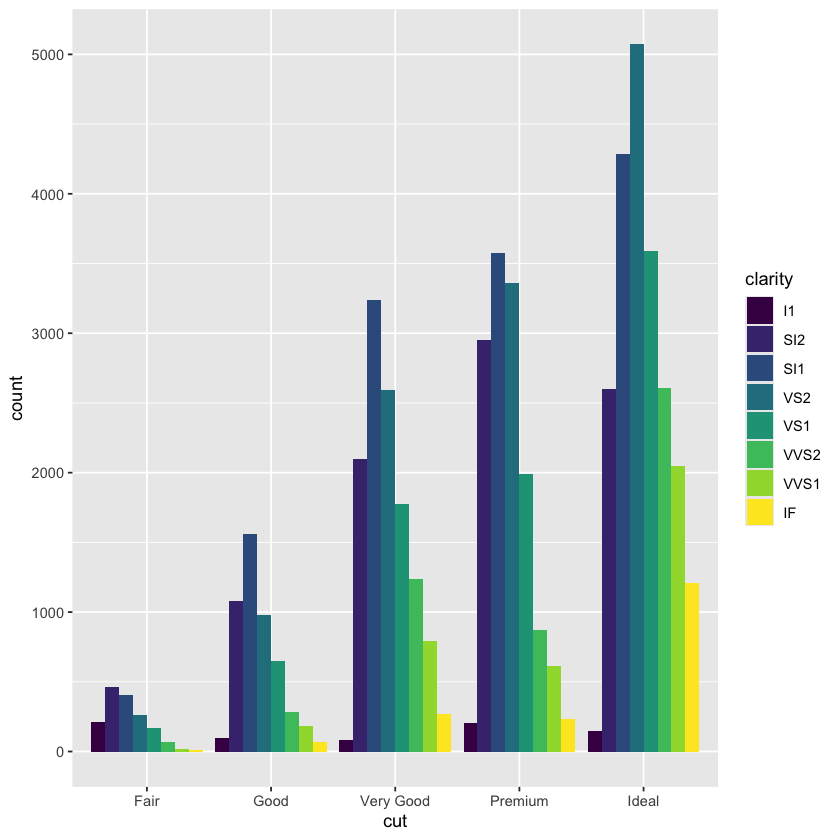

In [65]:
ggplot(data = diamonds) + 
  geom_bar(
      aes(x = cut, fill = clarity),
      position = "dodge",
      )

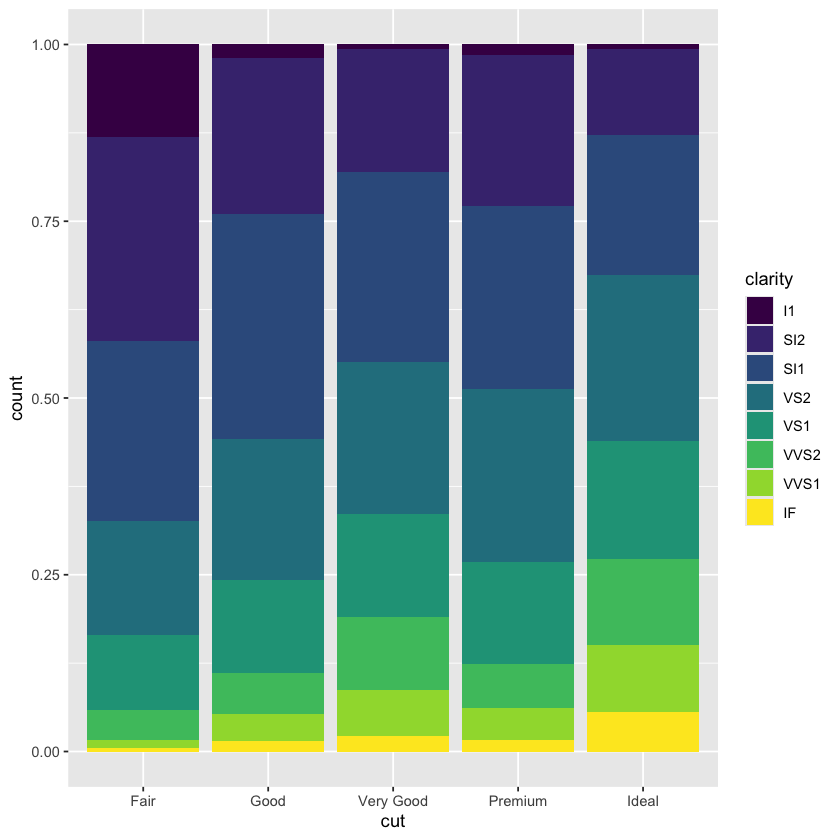

In [17]:
ggplot(data = diamonds) + 
  geom_bar(
      aes(x = cut, fill = clarity),
      position = "fill",
      )

La posición del elemento geométrico también resulta útil cuando se trata de visualización de puntos, para gestionar el caso de la superposición de elementos en la visualización. Por ejemplo, en el gráfico "nombre a definir" se visualiza sólo 126 puntos a pesar que la tabla de datos tiene 234 observaciones. La razón es justamente por la superposición de puntos.

Una manera de evitar que perdamos información visual frente al efecto de la superposción es agregar un pequeño delta aleatorio al valor del punto de modo que se diferencie de otro registro con el mismo valor. En el caso de "geom_point", si usamos el parámetro de posición "jitter" conseguimos ese efecto. 

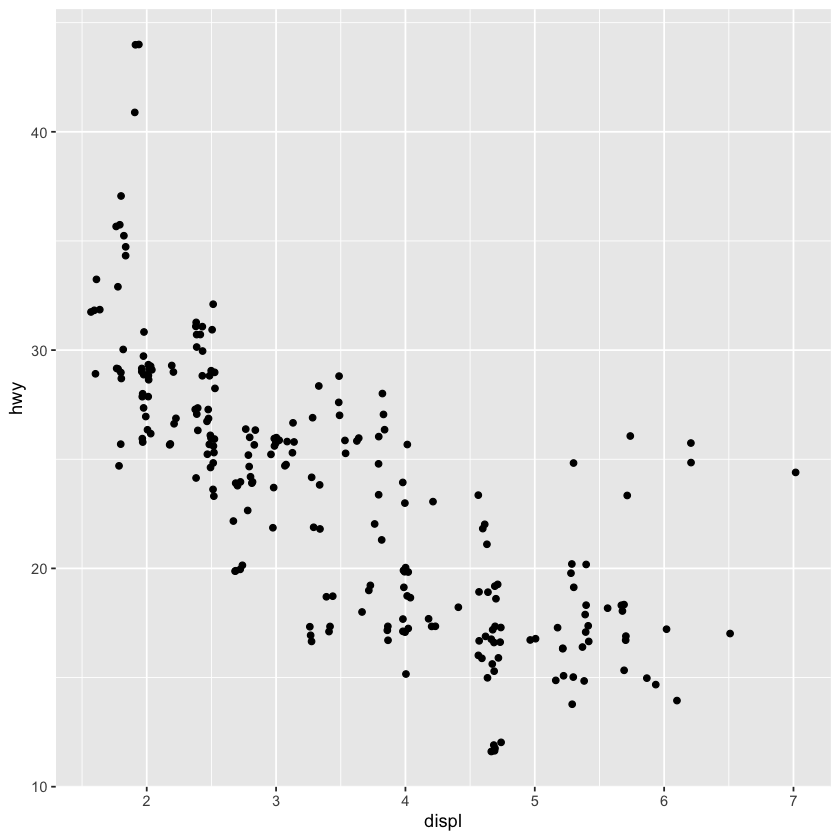

In [20]:
ggplot(data = mpg) +
  geom_point(
    aes(x = displ, y = hwy),
    position = "jitter"
  )

Otra manera de gestionar la superposición visual es trabajando con la transparencia de la geometría. Para esto usamos el parámetro "alpha" del objeto geométrico.

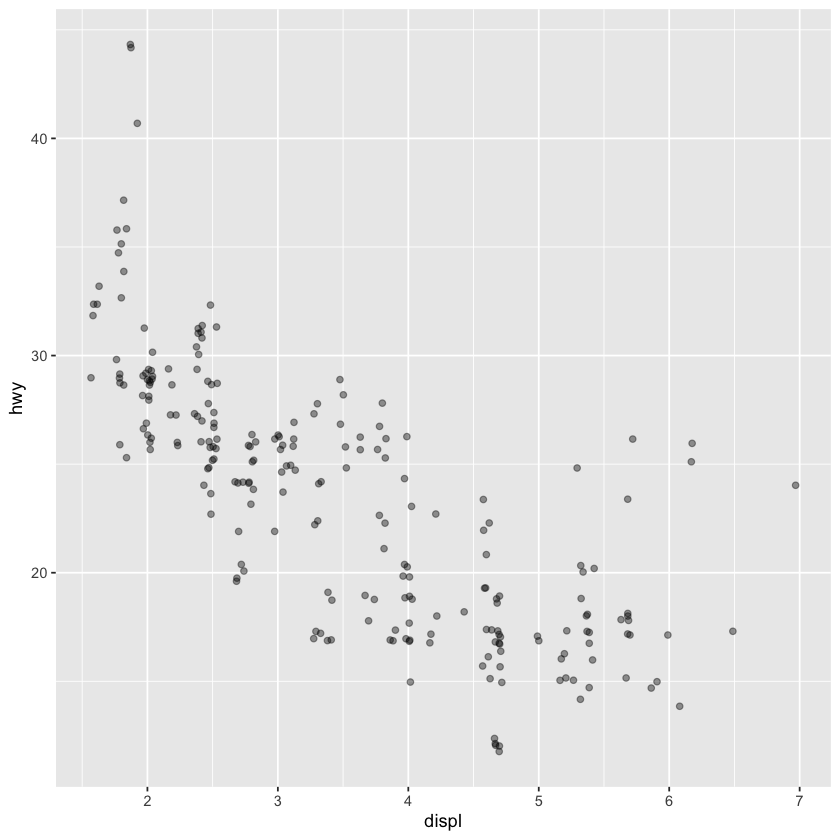

In [69]:
ggplot(data = mpg) +
  geom_point(
    aes(x = displ, y = hwy),
    position = "jitter",
    alpha = 0.4
  )

Facets
===

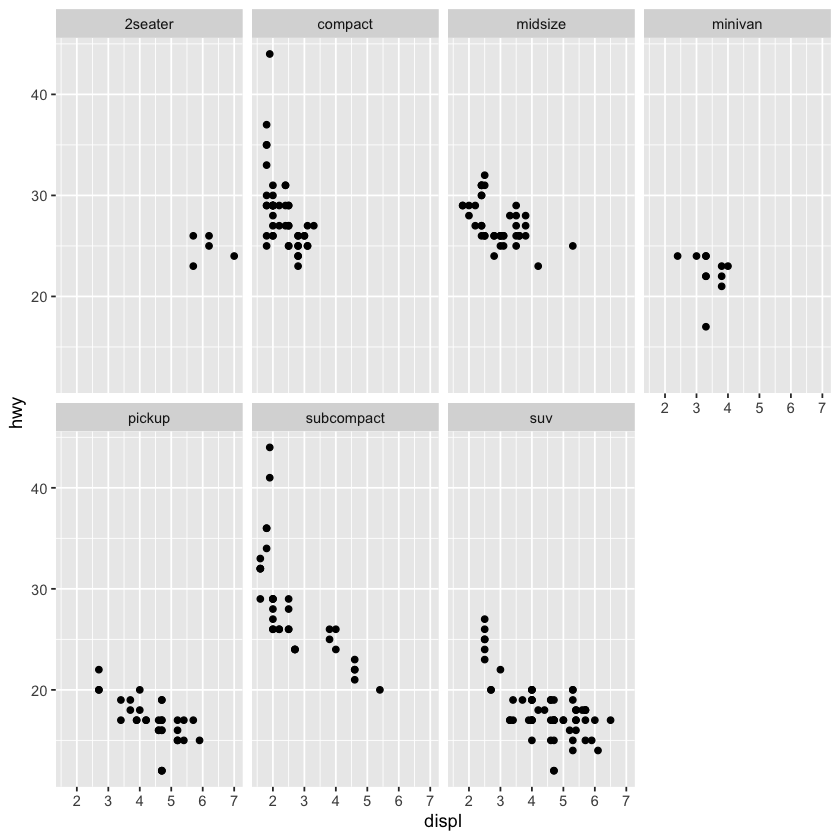

In [21]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_wrap(~ class, nrow = 2)

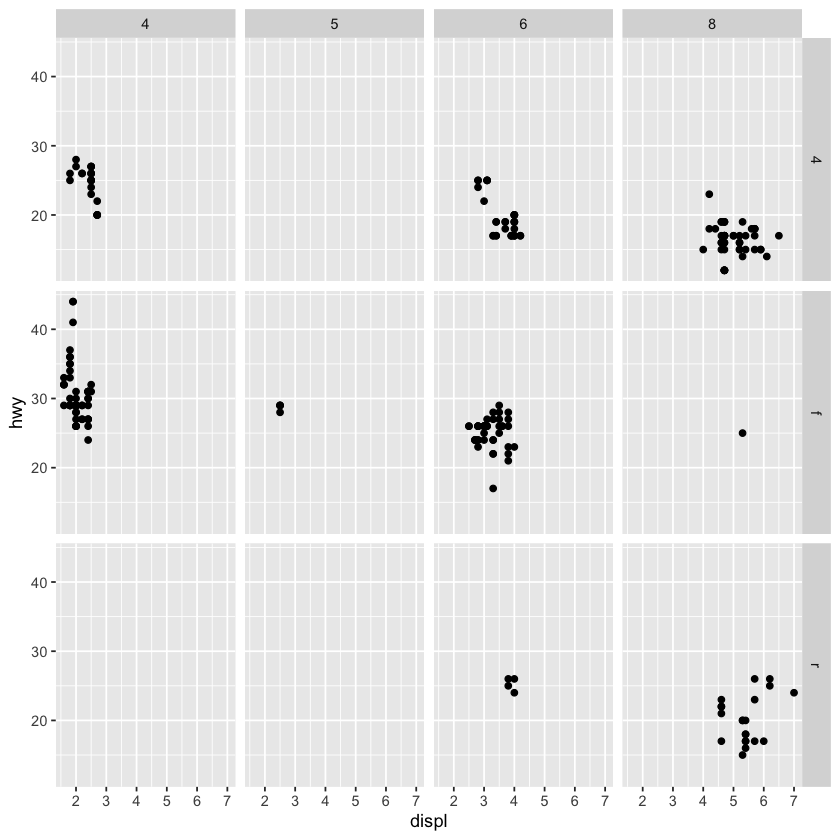

In [22]:
ggplot(data = mpg) + 
  geom_point(aes(x = displ, y = hwy)) +
  facet_grid(drv ~ cyl)

Statistical Transformations
===

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


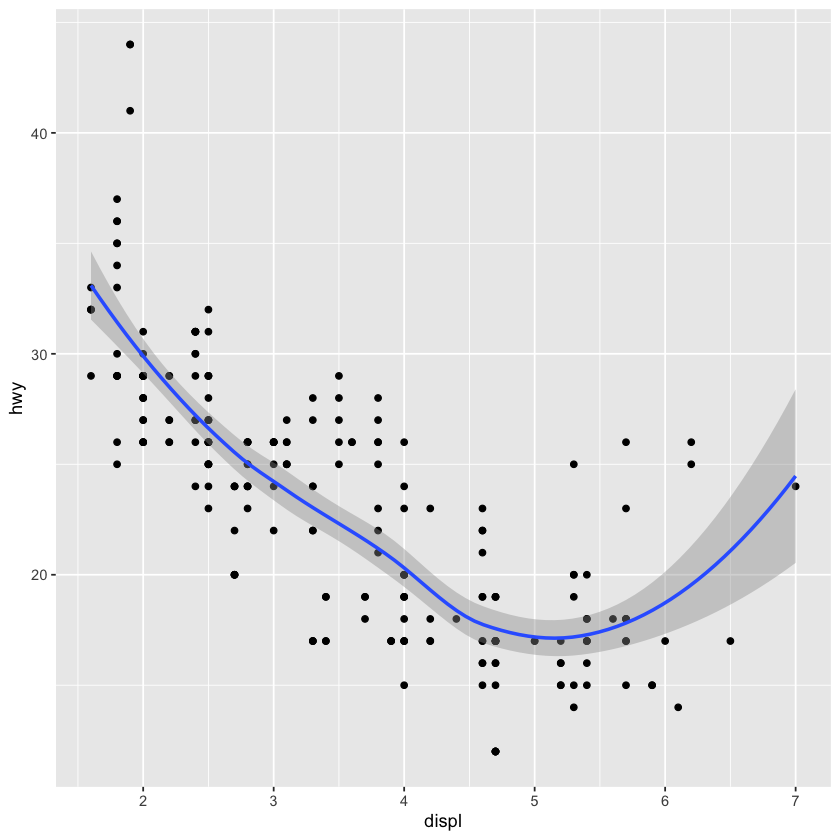

In [29]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy)) +
  geom_smooth(aes(x = displ, y = hwy))

Cuando combinamos dos geometrías, como es el caso del gráfico anterior en que combinamos la capa de la geometría "punto" y la capa de la geometría línea ajustada ("smooth"), podemos notar que se produce una redundancia al redactar los parámetros de Aesthetic ("aes(x = displ, y = hwy")) tanto para una capa (punto) como para la otra (línea). Esta redundancia puede ser evitada colocando esos parámetros directamente en la capa superior para que sea aplicado a las capas inferiores por defecto.

Veamos a continuación el código que elimina esa redundancia produciendo el mismo gráfico.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


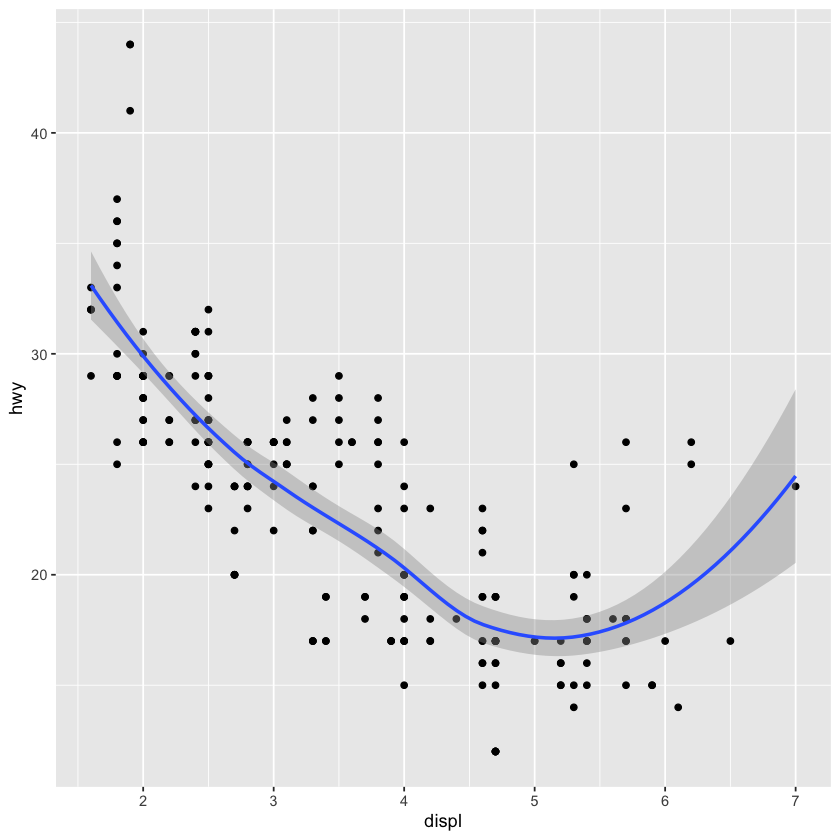

In [40]:
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


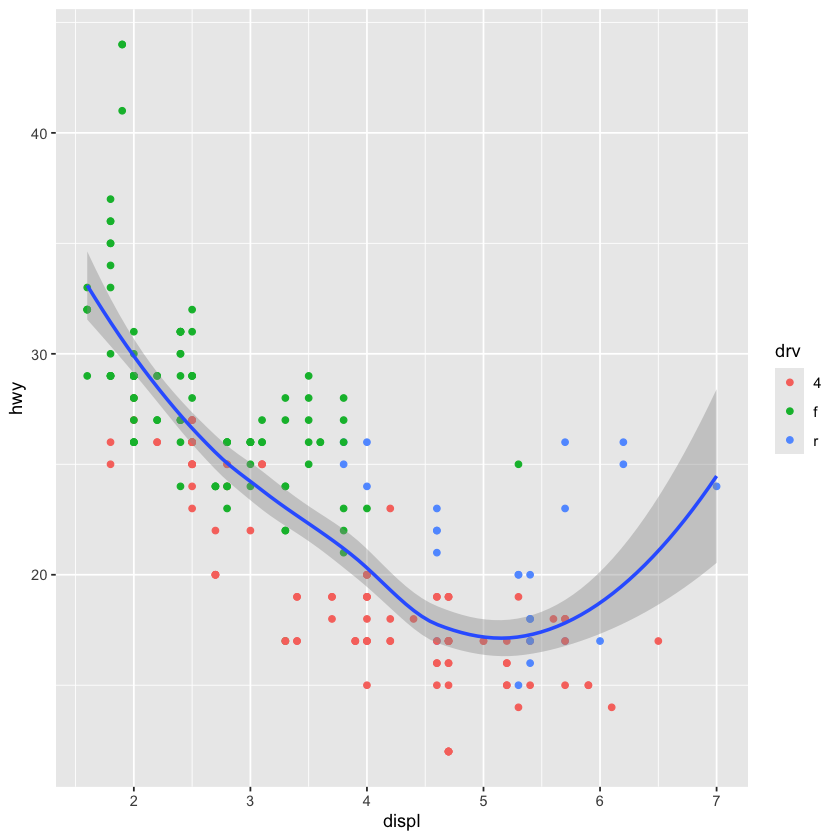

In [33]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy, color = drv)) +
  geom_smooth(aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


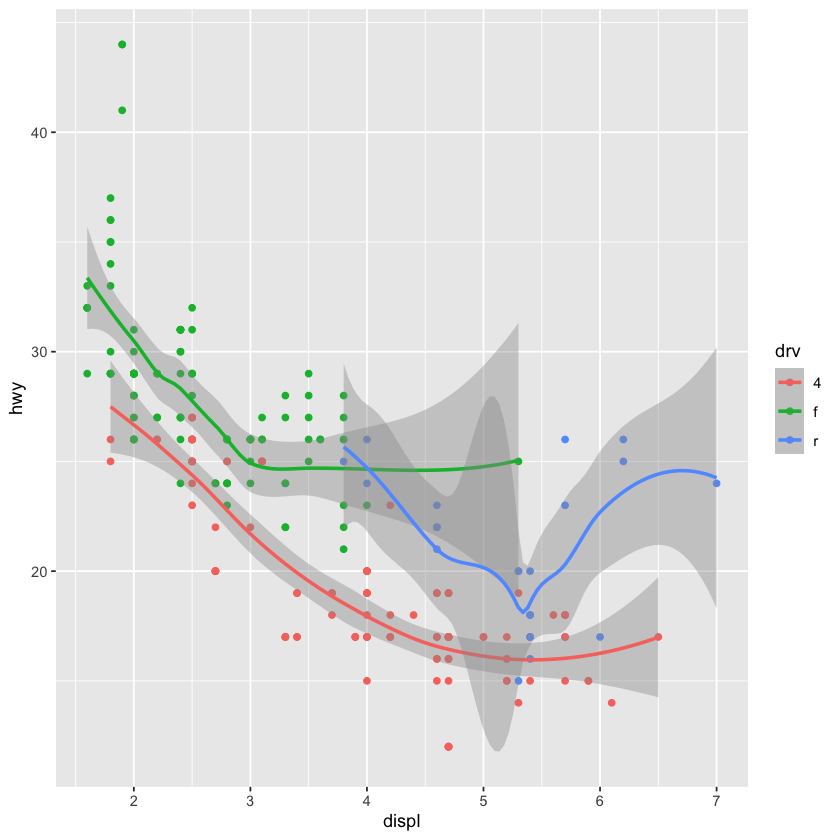

In [36]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy, color = drv)) +
  geom_smooth(aes(x = displ, y = hwy, color = drv))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


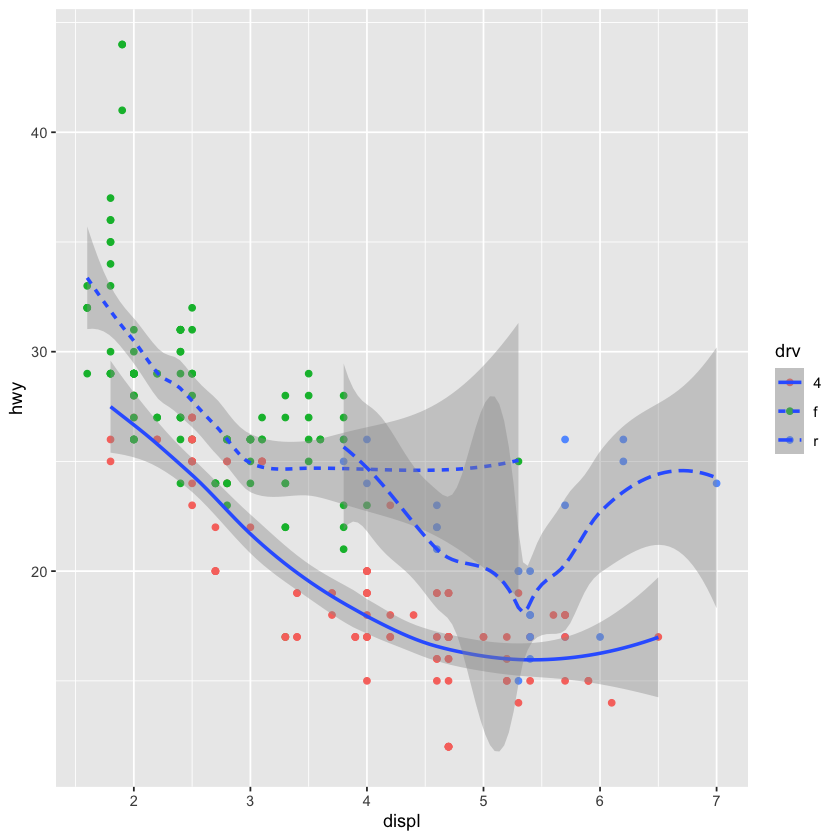

In [34]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy, color = drv)) +
  geom_smooth(aes(x = displ, y = hwy, linetype = drv))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


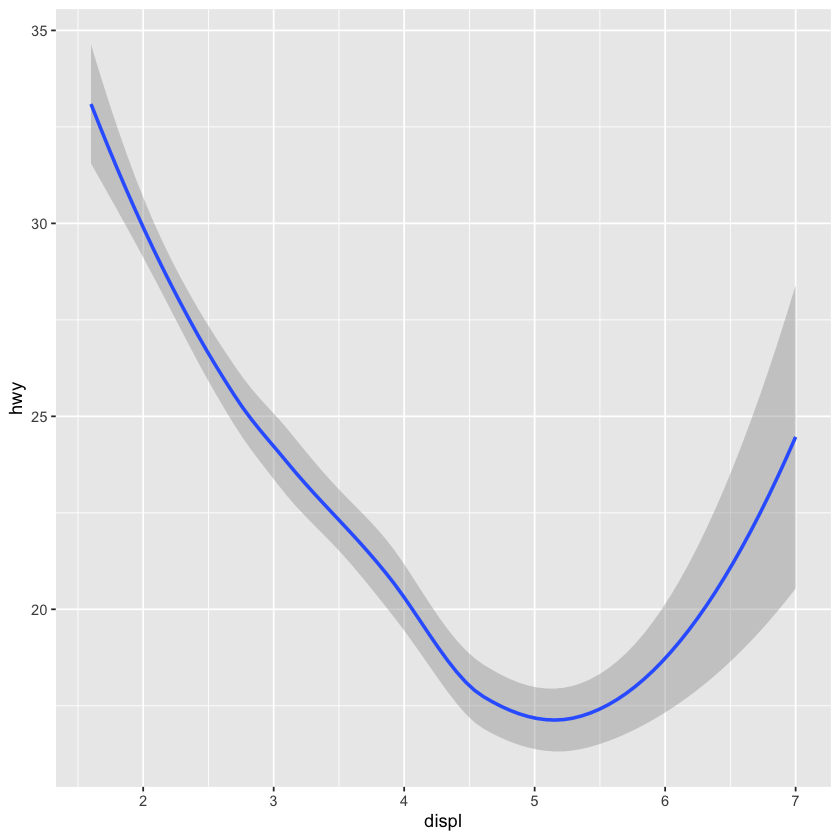

In [26]:
ggplot(data = mpg) +
  geom_smooth(aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


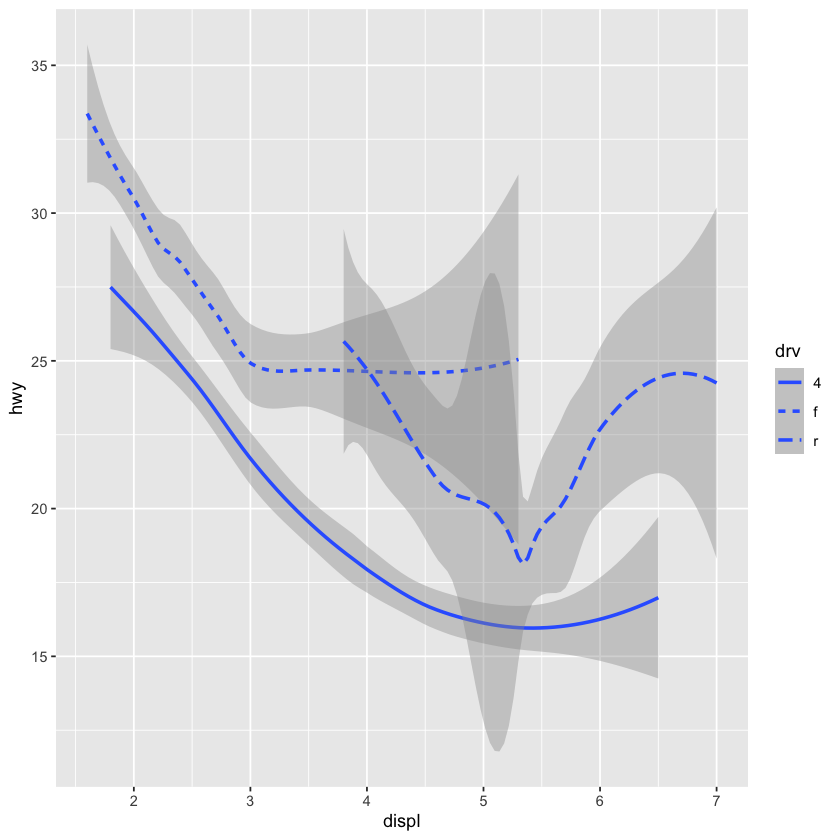

In [38]:
ggplot(data = mpg) +
  geom_smooth(aes(x = displ, y = hwy, linetype = drv))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


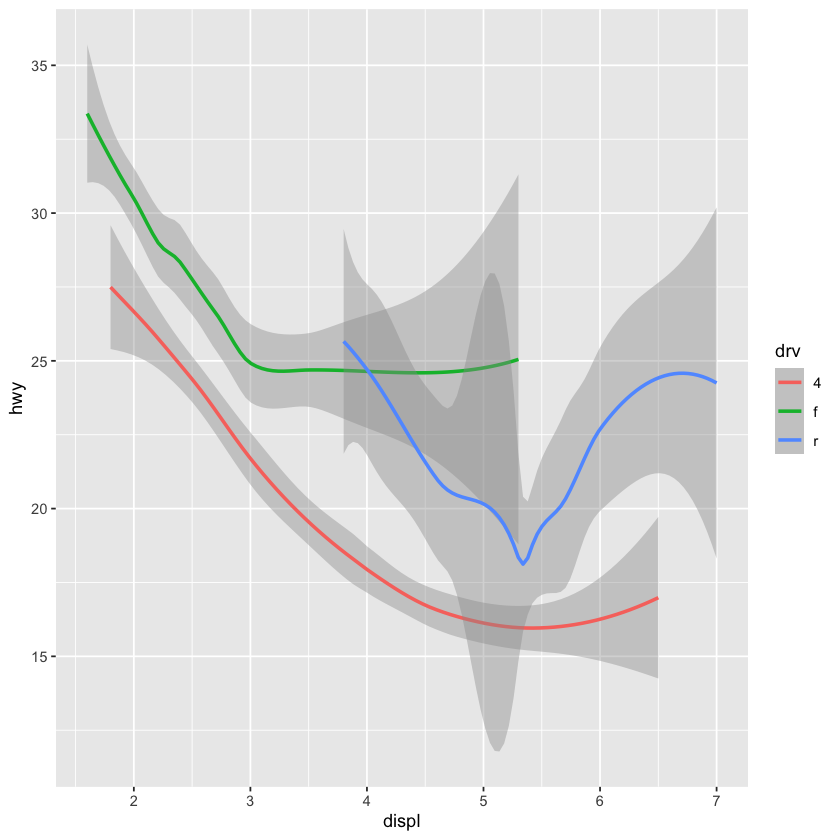

In [39]:
ggplot(data = mpg) +
  geom_smooth(aes(x = displ, y = hwy, color = drv))

Capas de visualización "versátiles" en la fuente de datos
===

En los ejemplo anteriores hemos visto las ventajas de trabajar bajo la lógica de capas de visualización de la información, explotando la posibilidad de ajustar los parámetros de cada capa según nuestra necesidad de transmistir información visualmente.

Este concepto de las capas puede incluso extender su versatilidad haciendo que cada capa tenga su propia fuente de datos a ser visualizado.

Por ejemplo, digamos que queremos resaltar visualmente la curva ajustada ("geom_smooth") de la eficiencia en carretera (hwy) para la categoría "subcompact".

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


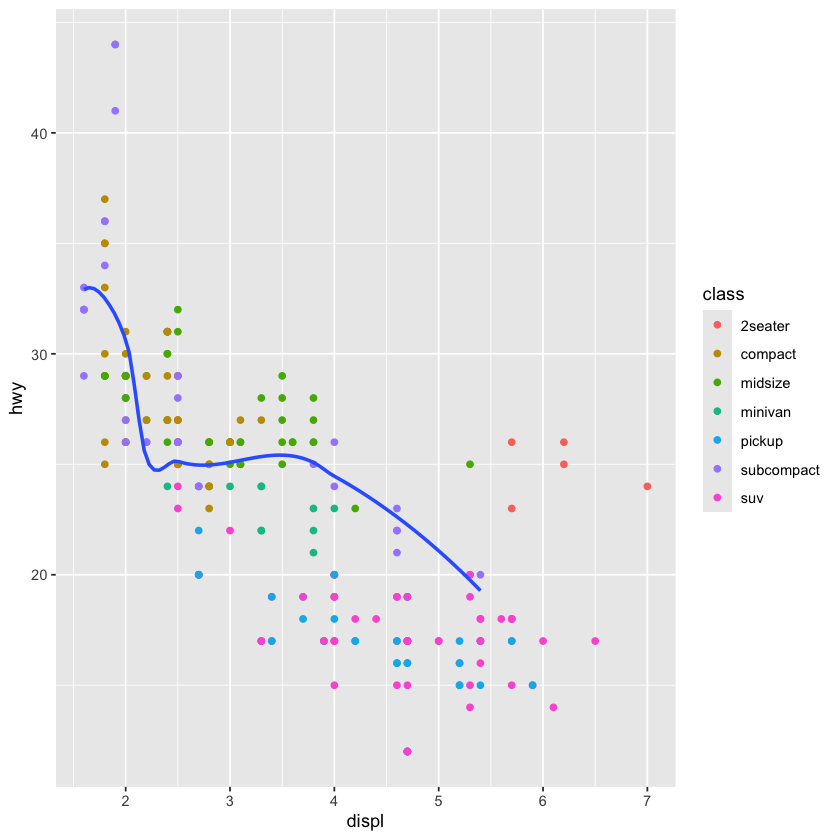

In [64]:
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point(aes(color = class)) +
  geom_smooth(data = filter(mpg, class == "subcompact"),se = FALSE)

Colocando títulos de encabezado y ejes
===

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


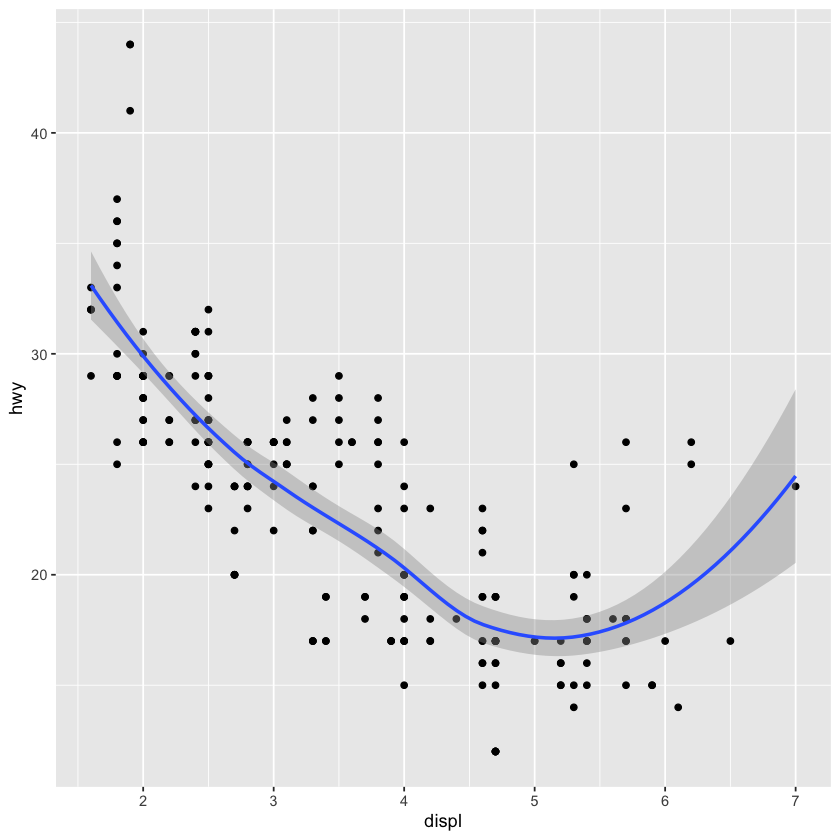

In [7]:
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth()

Ahora completemos el gráfico anterior con una mejor descripción de la información visualizadas, colocando títulos de encabezado y a los ejes.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


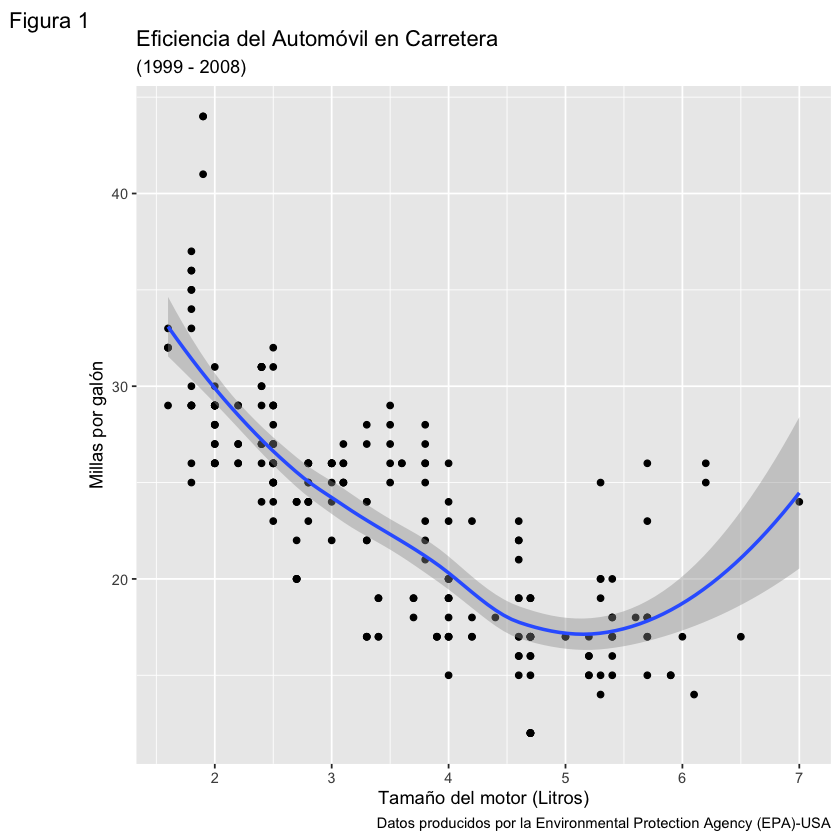

In [21]:
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Eficiencia del Automóvil en Carretera",
       subtitle = "(1999 - 2008)",
       caption = "Datos producidos por la Environmental Protection Agency (EPA)-USA",
       tag = "Figura 1",
       x = "Tamaño del motor (Litros)",
       y = "Millas por galón")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


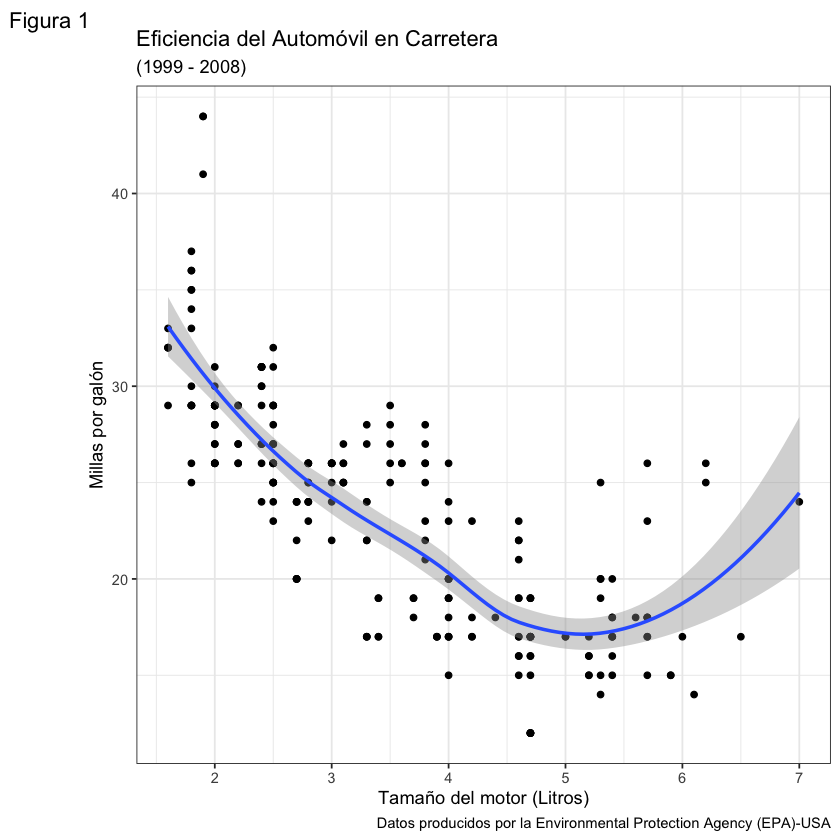

In [22]:
ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Eficiencia del Automóvil en Carretera",
       subtitle = "(1999 - 2008)",
       caption = "Datos producidos por la Environmental Protection Agency (EPA)-USA",
       tag = "Figura 1",
       x = "Tamaño del motor (Litros)",
       y = "Millas por galón") +
  theme_bw()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


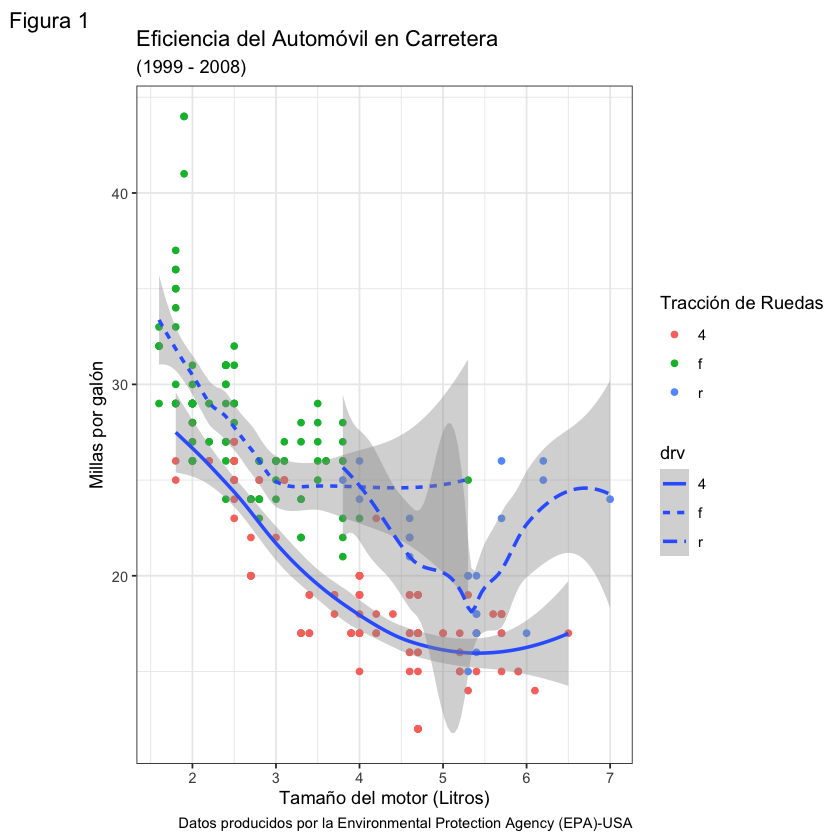

In [18]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy, color = drv)) +
  geom_smooth(aes(x = displ, y = hwy, linetype = drv)) +
  labs(title = "Eficiencia del Automóvil en Carretera",
       subtitle = "(1999 - 2008)",
       caption = "Datos producidos por la Environmental Protection Agency (EPA)-USA",
       tag = "Figura 1",
       x = "Tamaño del motor (Litros)",
       y = "Millas por galón",
       color = "Tracción de Ruedas"
      ) +
  theme_bw()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


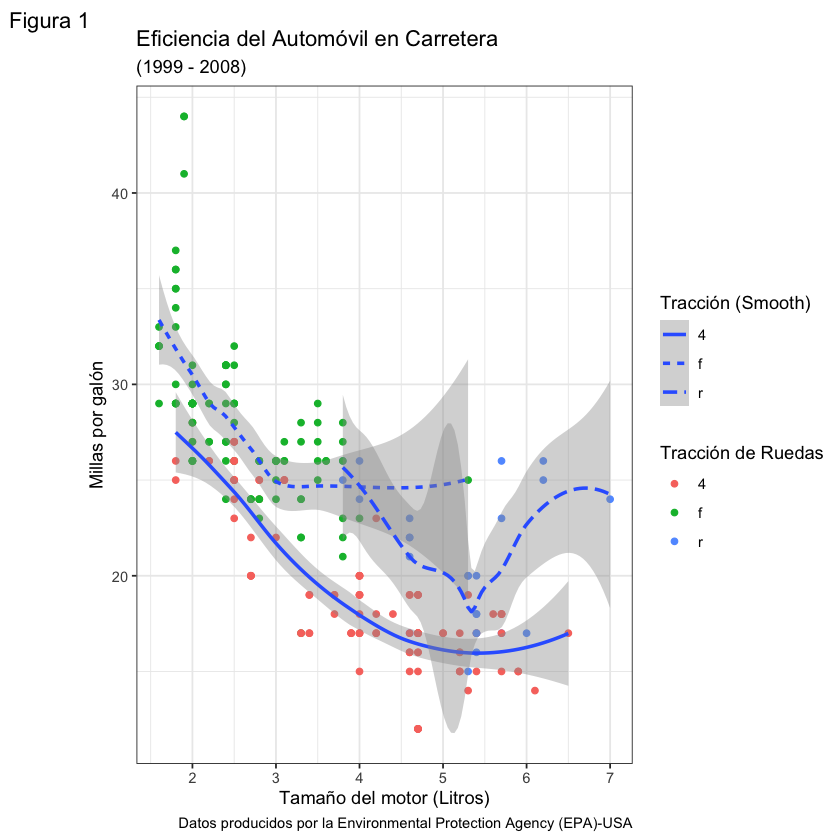

In [20]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy, color = drv)) +
  geom_smooth(aes(x = displ, y = hwy, linetype = drv)) +
  labs(title = "Eficiencia del Automóvil en Carretera",
       subtitle = "(1999 - 2008)",
       caption = "Datos producidos por la Environmental Protection Agency (EPA)-USA",
       tag = "Figura 1",
       x = "Tamaño del motor (Litros)",
       y = "Millas por galón",
       color = "Tracción de Ruedas",
       linetype = "Tracción (Smooth)"
      ) +
  theme_bw()

También podemos configurar la posición de las legendas de categorías. Por ejemplo, podemos indicar que deseamos que se coloquen abajo ("bottom") del gráfico en lugar de al lado como es por defecto.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


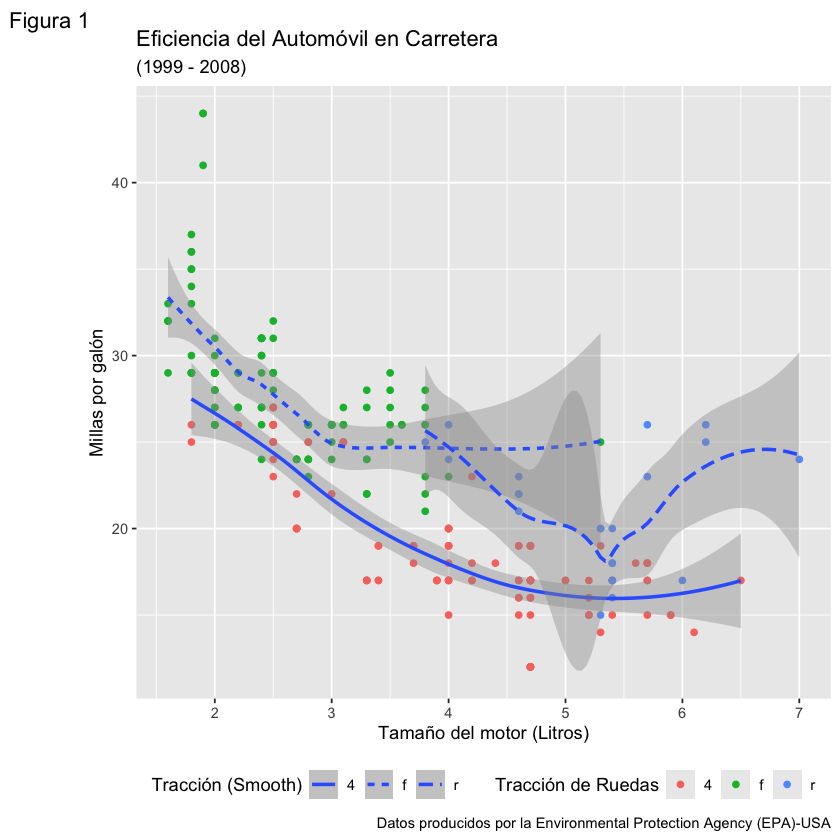

In [30]:
ggplot(data = mpg) +
  geom_point(aes(x = displ, y = hwy, color = drv)) +
  geom_smooth(aes(x = displ, y = hwy, linetype = drv)) +
  labs(title = "Eficiencia del Automóvil en Carretera",
       subtitle = "(1999 - 2008)",
       caption = "Datos producidos por la Environmental Protection Agency (EPA)-USA",
       tag = "Figura 1",
       x = "Tamaño del motor (Litros)",
       y = "Millas por galón",
       color = "Tracción de Ruedas",
       linetype = "Tracción (Smooth)"
      ) +
  theme(legend.position = "bottom")

<img src="List_Basic_Themes.png">

Graficando Séries de Tiempo
===

Veamos las funcionalidades que nos ofrece el paquete ggplot2 para graficar tablas que involucran campos del tipo fecha ("Date"). Tomemos como ejemplo la tabla "economics" que viene incluida en ese paquete.

In [28]:
?economics

economics {ggplot2},R Documentation


In [31]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


In [29]:
str(economics)

spc_tbl_ [574 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date    : Date[1:574], format: "1967-07-01" "1967-08-01" ...
 $ pce     : num [1:574] 507 510 516 512 517 ...
 $ pop     : num [1:574] 198712 198911 199113 199311 199498 ...
 $ psavert : num [1:574] 12.6 12.6 11.9 12.9 12.8 11.8 11.7 12.3 11.7 12.3 ...
 $ uempmed : num [1:574] 4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: num [1:574] 2944 2945 2958 3143 3066 ...


In [32]:
str(economics_long)

tibble [2,870 × 4] (S3: tbl_df/tbl/data.frame)
 $ date    : Date[1:2870], format: "1967-07-01" "1967-08-01" ...
 $ variable: chr [1:2870] "pce" "pce" "pce" "pce" ...
 $ value   : num [1:2870] 507 510 516 512 517 ...
 $ value01 : num [1:2870] 0 0.000265 0.000762 0.000471 0.000916 ...


In [33]:
head(economics_long)

date,variable,value,value01
<date>,<chr>,<dbl>,<dbl>
1967-07-01,pce,506.7,0.0000000000
1967-08-01,pce,509.8,0.0002652497
1967-09-01,pce,515.6,0.0007615234
1967-10-01,pce,512.2,0.0004706043
1967-11-01,pce,517.4,0.0009155394
1967-12-01,pce,525.1,0.0015743854


In [34]:
df2 <- economics_long[economics_long$date > as.Date("2000-01-01"), ] %>%
  filter(variable == "pce" | variable == "unemploy")

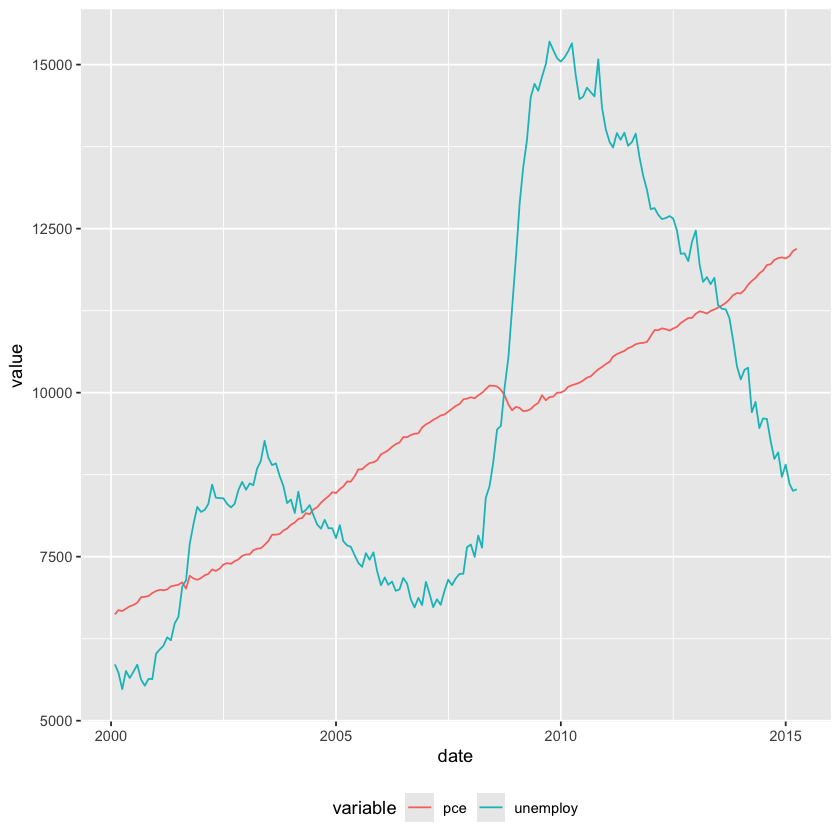

In [35]:
ggplot(df2, aes(x = date, y = value, color = variable)) +
  geom_line() +
  theme(legend.position = "bottom")

In [36]:
df3 <- economics_long[economics_long$date > as.Date("2000-01-01"), ]

In [37]:
head(df3)

date,variable,value,value01
<date>,<chr>,<dbl>,<dbl>
2000-02-01,pce,6619.7,0.5230553
2000-03-01,pce,6685.8,0.5287111
2000-04-01,pce,6671.1,0.5274533
2000-05-01,pce,6707.6,0.5305764
2000-06-01,pce,6743.9,0.5336824
2000-07-01,pce,6764.1,0.5354108


In [38]:
df3 <- filter(df3, variable == "pce" | variable == "unemploy")

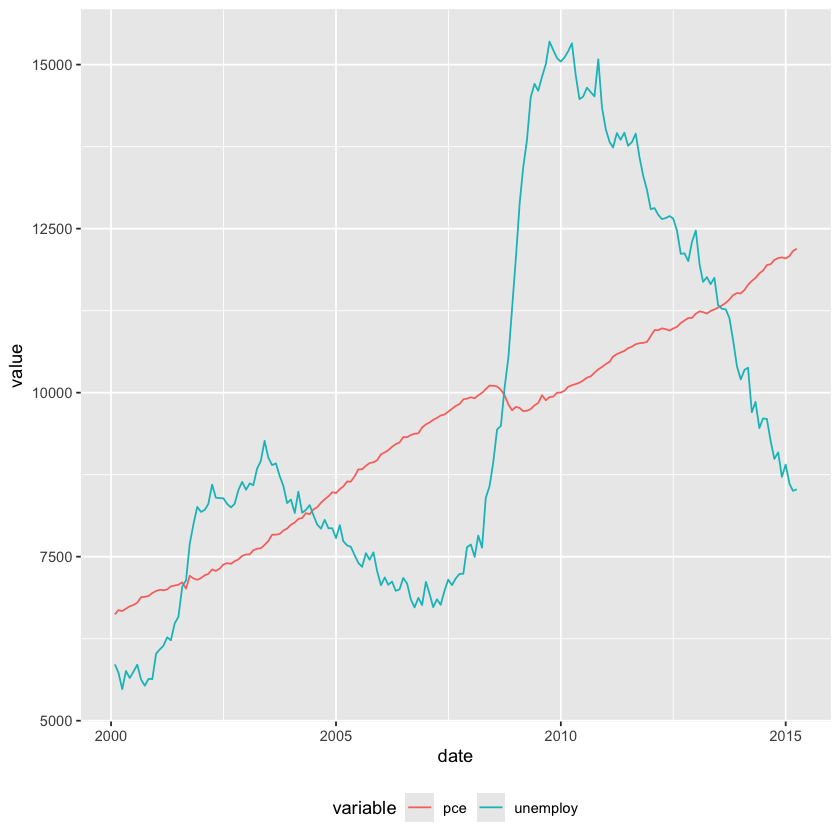

In [39]:
ggplot(df3, aes(x = date, y = value, color = variable)) +
  geom_line() +
  theme(legend.position = "bottom")

Ahora volvamos a trabajar con el formato "datoxcolumna" de la tabla "economics".

In [41]:
df <- economics[economics$date > as.Date("2000-01-01"), ]

In [42]:
df$year <- year(df$date)

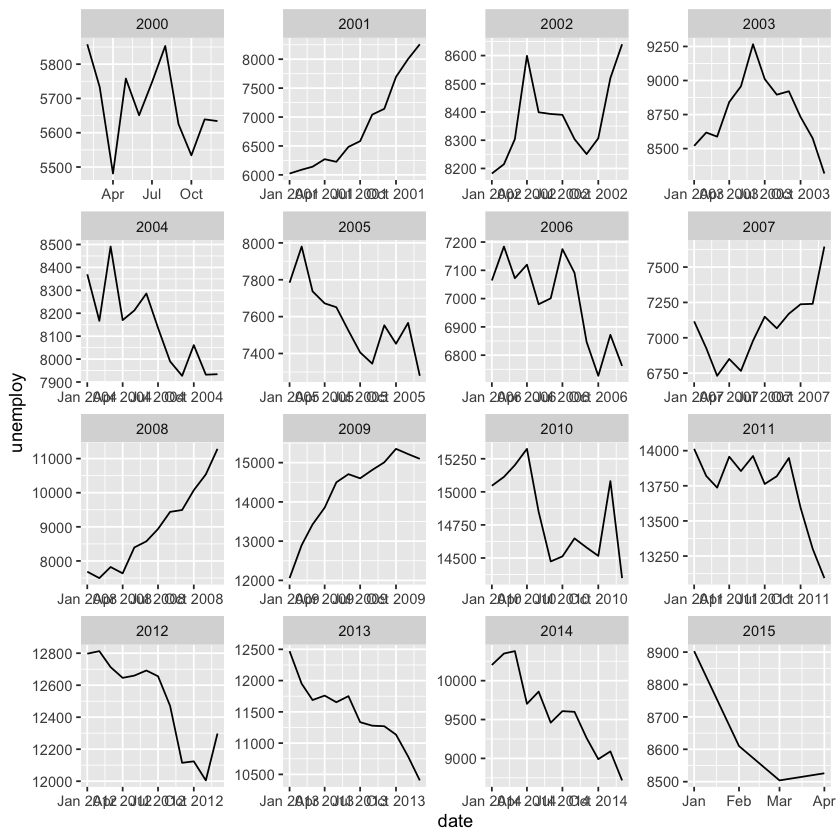

In [44]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() + 
  facet_wrap(~year, scales = "free")

Usando "scale_x_date" para ajustar formato del eje "X" de la serie de tiempo
===

Con la función "scale_x_date" podemos ajustar el formato de fecha del eje "X" cuando éste es una fecha (que es el caso de las series de tiempo). Por ejemplo, seremos capaces de transformar el formato de las fechas, los límites de fecha del gráfico o la cantidad de cuadrículas ("breaks" o "minor breaks") para los ejes del gráfico.

En la siguiente imagen se muestra una lista de los símbolos comunmente usados para especificar diferentes formatos de fecha.

<img src = "lista_simbolos_fecha.png">

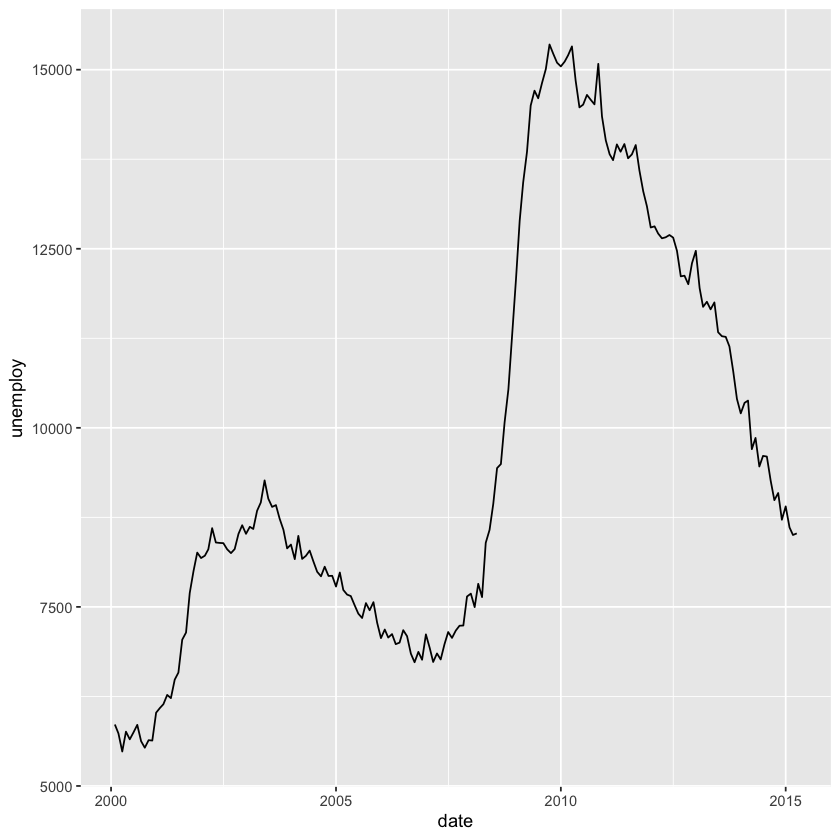

In [45]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line()

El parámetro "dat_labels" de la función "scale_x_date" puede ser usado para ajustar el formato de fecha que deseamos sea visualizado en nuestro gráfico.

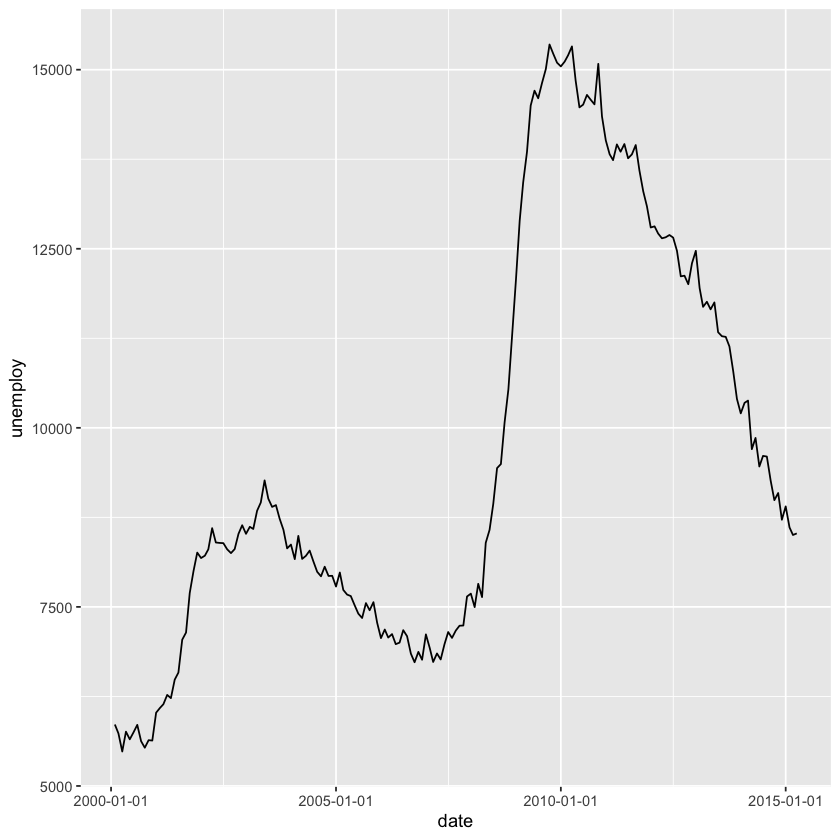

In [46]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() +
  scale_x_date(date_labels = "%Y-%m-%d")

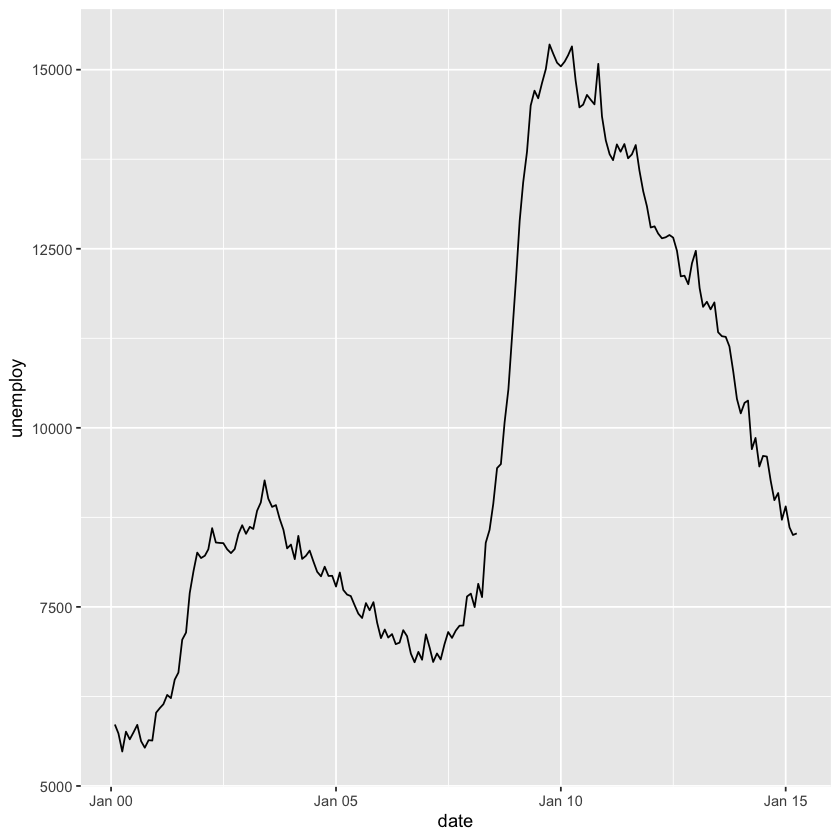

In [51]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() +
  scale_x_date(date_labels = "%b %y")

También podemos limitar las fechas de visualización del eje "X". Para esto usamos el parámetro "limit" de la función "scale_x_date".

Warning message:
“Removed 122 rows containing missing values or values outside the scale range
(`geom_line()`).”


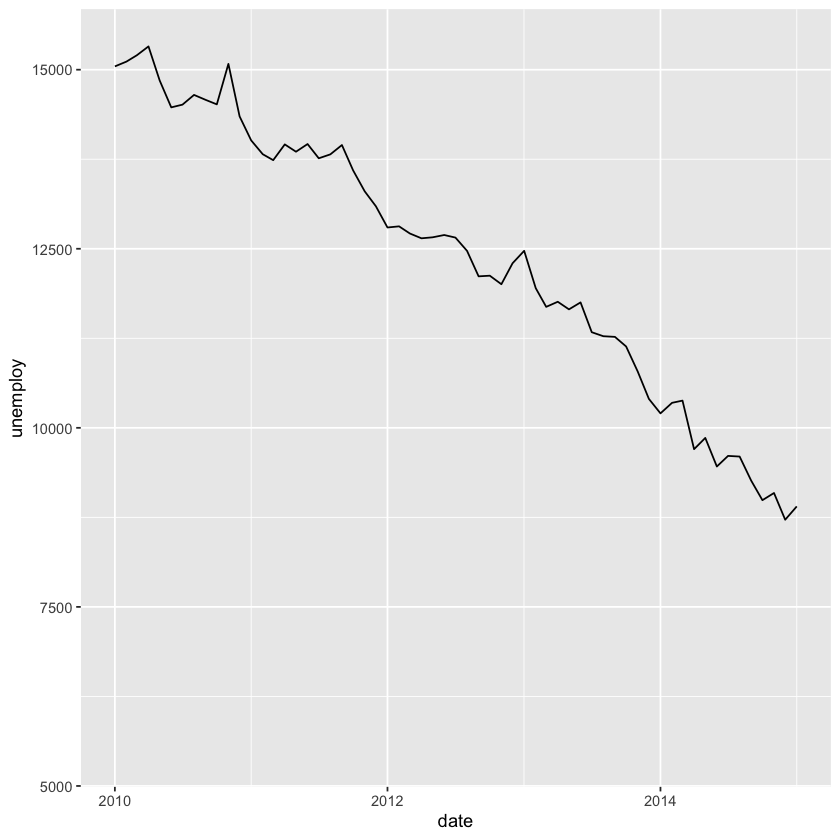

In [47]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() +
  scale_x_date(limit = c(as.Date("2010-01-01"), as.Date("2015-01-01")))

Se puede determinar grillas específicas que deseamos resaltar con el parámetro "breaks" de la función "scale_x_date". 

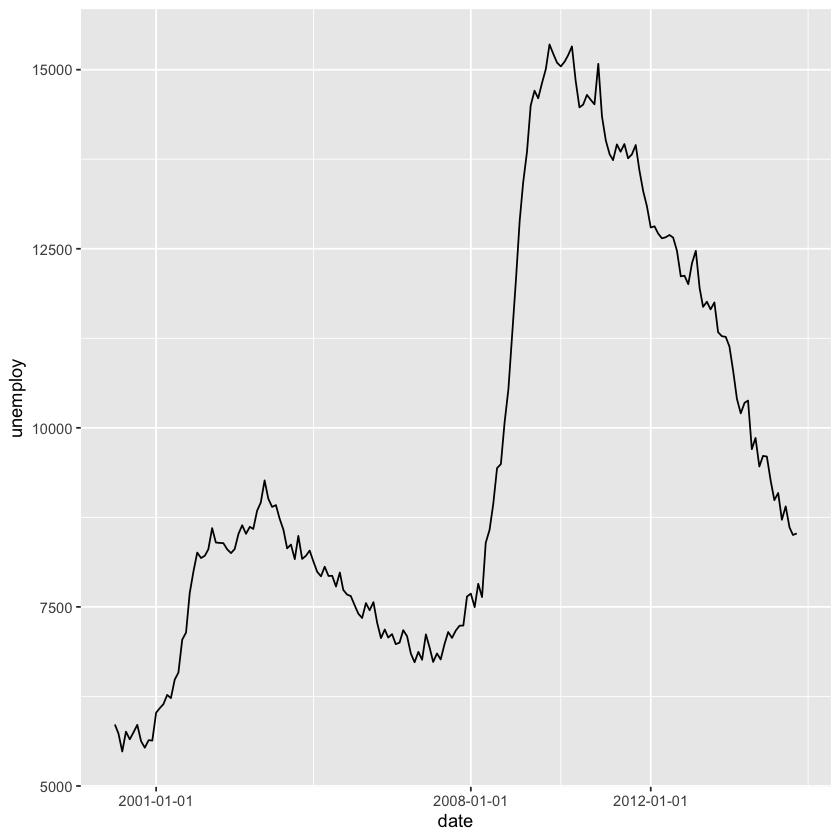

In [48]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() +
   scale_x_date(breaks = c(as.Date("2001-01-01"),
                           as.Date("2008-01-01"),
                           as.Date("2012-01-01")))

También podemos especificar grillas de intervalos regulares, como por ejemplo cada día ("1 day"), cada dos meses ("2 months"), cada seis años ("6 years") y así por el estilo.

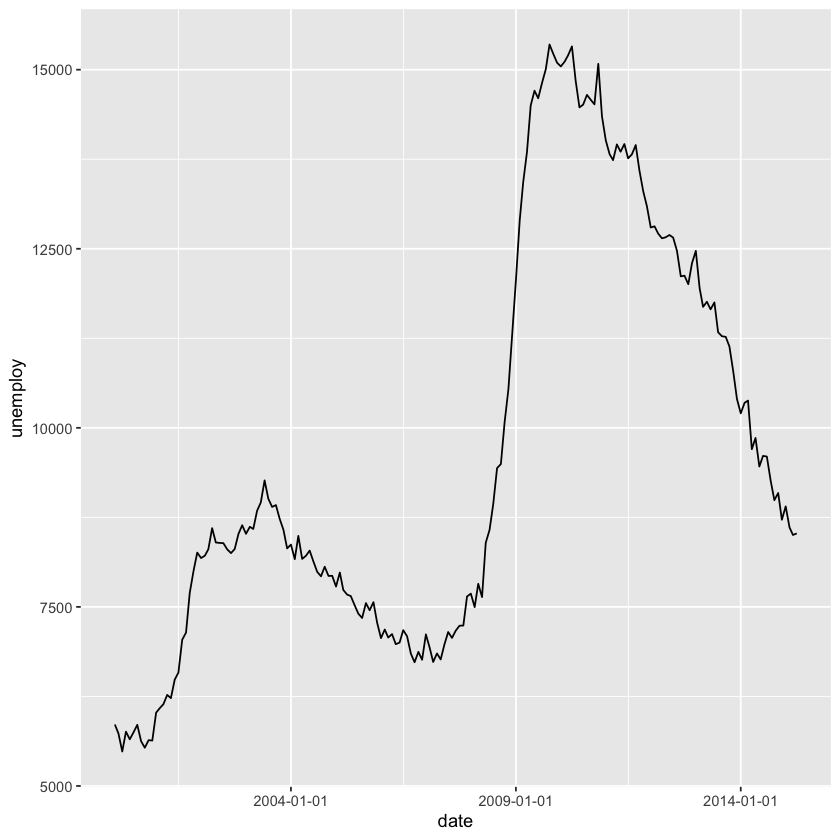

In [49]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() +
   scale_x_date(date_breaks = "5 years")

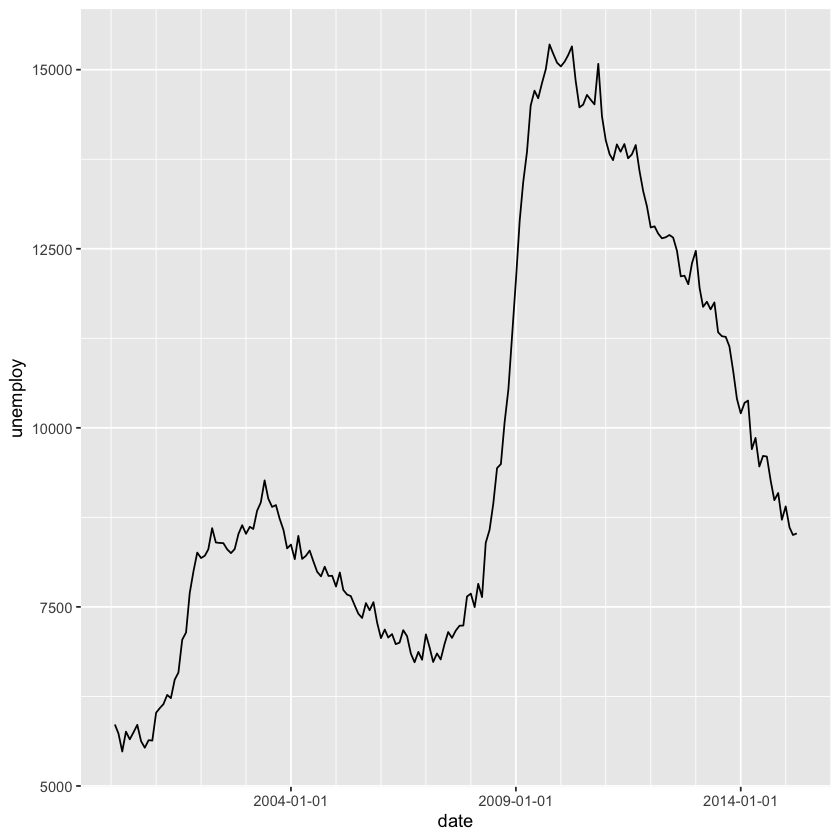

In [50]:
ggplot(df, aes(x = date, y = unemploy)) +
  geom_line() +
   scale_x_date(date_breaks = "5 years", 
                date_minor_breaks = "1 year")